In [1]:
# imports
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
#load the developer credentials in excel
from google.colab import files
uploaded = files.upload()

Saving developer_account_credentials.xlsx to developer_account_credentials.xlsx


In [38]:
log = pd.read_excel('developer_account_credentials.xlsx')
#switch to csv
log.to_csv('developer_account_credentials.csv', index = None, header=True)
log_csv = pd.read_csv('developer_account_credentials.csv')

In [39]:
# get credentials in variables
consumerKey = log['key'][0]
consumerSecret = log['secret_key'][0]
accessToken = log['token'][0]
accessTokenSecret = log['secret_token'][0]

In [41]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [75]:
# Extract 300 tweets from the twitter user
posts = api.user_timeline(screen_name = "ComradeJoStalin", count = 300, lang = "en", tweet_mode = "extended")

# print 5 tweets
print("Show 5 recent tweets: \n")
i = 1
for tweet in posts[10:15]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i+=1

Show 5 recent tweets: 

1) @VaushV I kept it at 70 degrees like a normal human being, thank you very much. No reason to feel like a gulag prisoner.

2) @Disfigu31979802 @McFaul 142 года.

3) @Disfigu31979802 @McFaul Привет Товарищ. У меня нет друзей.

4) @kgb_files I recognize myself and I bunch of losers.

5) @poldiscoursebot Royalty is a virus that must be exterminated.



In [76]:
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['tweets'])

# Show first 5 rows of data
df.head()

,tweets
0,@IndependentIPR @krummenacher @press_project @...
1,"@JJD_Aqua Yes, but then I removed them all fro..."
2,@JJD_Aqua Traitors don’t last long enough to d...
3,@vanillatary But 14 year olds are my biggest s...
4,@null_fruit @getfiscal I did like to put the g...


In [78]:
# clean the text

def cleanTxt(text):
  # remove @mentions
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  # remove '#' symbol
  text = re.sub(r'#', '', text)
  # remove 'RT' - retweets
  text = re.sub(r'RT[\s]+', '', text)
  # remove URLs
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

# Apply the function - clean the tweets
df['tweets'] = df['tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,tweets
0,"_project Uh, why am I tagged in this?"
1,"_Aqua Yes, but then I removed them all from ph..."
2,_Aqua Traitors don’t last long enough to deser...
3,But 14 year olds are my biggest supporters.
4,_fruit I did like to put the girls to work 70...
...,...
195,This man is a perfect depiction of capitalism.
196,I am a very open-minded man.
197,Both. Cause &amp; effect. Capitalism is the c...
198,Being gay for me is an exception to the above...


In [79]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['subjectivity'] = df['tweets'].apply(getSubjectivity)
df['polarity'] = df['tweets'].apply(getPolarity)

# Show new dataframe
df

,tweets,subjectivity,polarity
0,"_project Uh, why am I tagged in this?",0.000000,0.000000
1,"_Aqua Yes, but then I removed them all from ph...",0.000000,0.000000
2,_Aqua Traitors don’t last long enough to deser...,0.322222,-0.016667
3,But 14 year olds are my biggest supporters.,0.000000,0.000000
4,_fruit I did like to put the girls to work 70...,0.000000,0.000000
...,...,...,...
195,This man is a perfect depiction of capitalism.,1.000000,1.000000
196,I am a very open-minded man.,0.910000,0.520000
197,Both. Cause &amp; effect. Capitalism is the c...,0.000000,0.000000
198,Being gay for me is an exception to the above...,0.341667,0.208333


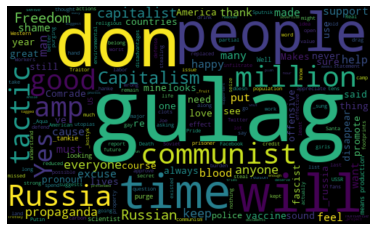

In [80]:
# Visualise a word cloud
allWords = ' '.join([tweet for tweet in df['tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
# Create a function to compute negative, neutral, positive analysis
def getAnalysis(score):
  if score < 0:
    return "negative"
  elif score == 0:
    return "neutral"
  else:
    return "positive"

df['analysis'] = df['polarity'].apply(getAnalysis)
df

,tweets,subjectivity,polarity,analysis
0,"_project Uh, why am I tagged in this?",0.000000,0.000000,neutral
1,"_Aqua Yes, but then I removed them all from ph...",0.000000,0.000000,neutral
2,_Aqua Traitors don’t last long enough to deser...,0.322222,-0.016667,negative
3,But 14 year olds are my biggest supporters.,0.000000,0.000000,neutral
4,_fruit I did like to put the girls to work 70...,0.000000,0.000000,neutral
...,...,...,...,...
195,This man is a perfect depiction of capitalism.,1.000000,1.000000,positive
196,I am a very open-minded man.,0.910000,0.520000,positive
197,Both. Cause &amp; effect. Capitalism is the c...,0.000000,0.000000,neutral
198,Being gay for me is an exception to the above...,0.341667,0.208333,positive


In [87]:
# print all positive tweets
sortedDF = df.sort_values(by = ['polarity'], ascending=True)
sortedDF
j = 1
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['analysis'][i] == 'positive'):
    print(str(j) + ') ' + sortedDF['tweets'][i])
    j += 1

1) Capitalism tries to advertise a whole list of pronouns, but the only pronoun one needs is “Comrade”.
2)  It is, that’s why it was easy to infiltrate. Santa convinces capitalists to spend more money and they jump on board.
3) It is now time to reveal that Santa Claus is indeed a KGB agent who spies on children, dresses in red, and holds strong communist values. He simply could not waste the opportunity to infiltrate a silly Christian holiday.
4)  I kept it at 70 degrees like a normal human being, thank you very much. No reason to feel like a gulag prisoner.
5)  His statement sounds genuine and very not coerced to me.
6) _Anderson   Pride is a strong word, but they did employ a favorite tactic of mine.
7) : I don’t actually like Eurovision   It’s gay AND democratic.
8) While capitalist countries argue over how many masks to wear, communist utopias have successfully eliminated anyone with a cough. Just ask North Korea.
9)   Always happy to help.
10)  Good lookin’ man.
11)   I’m always 

In [101]:
# print all negative tweets
sortedDF = df.sort_values(by = ['polarity'], ascending=False)
sortedDF
j = 1
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['analysis'][i] == 'negative'):
    print(str(j) + ') ' + sortedDF['tweets'][i])
    j += 1

1) -0.016666666666666666_Aqua Traitors don’t last long enough to deserve a pronoun.
2) -0.2_files I recognize myself and I bunch of losers.
3) -0.15555555555555559 I do think America is burning down.
4) -0.15 Twitter is conspiring against me, they are afraid I will grow too powerful once again.
5) -0.06666666666666667 Excuse me, I am not just an average Joe who can be imitated by regular peasants.
6) -0.8 Don’t compare those idiots to me.
7) -0.025 Thank you, I’m going to borrow this excuse next time I have to defend my purges.
8) -0.8999999999999999 Real fucked up, yes.
9) -0.8 I missed nobody, I just died and was replaced by wimpy morons.
10) -0.05     Don’t drag me into religious nonsense.
11) -0.3 _   It’s way too late for you.
12) -0.5 Wtf is this??
13) -0.14444444444444446 Don’t drag me into your ridiculous western politics.
14) -0.3_Hartmann If Republicans are going to steal my tactics the least they could do is promote my communist ideology. Shame.
15) -0.1  Not only did I canc